<a href="https://colab.research.google.com/github/melihkurtaran/MachineLearning/blob/main/SelfOrganizingMaps/SelfOrganizingMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Self-Organizing Maps (SOM) Project**

Author: Melih Kurtaran

This project use the libraries minisom (https://github.com/JustGlowing/minisom), scikit-learn (https://scikit-learn.org) and matplotlib (https://matplotlib.org/).

Installation of minisom

In [13]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=b95e0d24de7449cf2161472ce01641b43b73db5b655509ed9b661a5beb1f0e49
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


Importing libraries

In [26]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.model_selection import train_test_split
import seaborn as sns

My group number is 11 so the classes I use 2, 5 and 7.

In [9]:
# Load the digits dataset
digits = load_digits()

# Create a boolean mask for the samples that correspond to class 2, 5, 7
mask = (digits.target == 2) | (digits.target == 5) | (digits.target == 7)

# Apply the mask to the data and target arrays
X = digits.data[mask]
y = digits.target[mask]

Plotting examples from each class

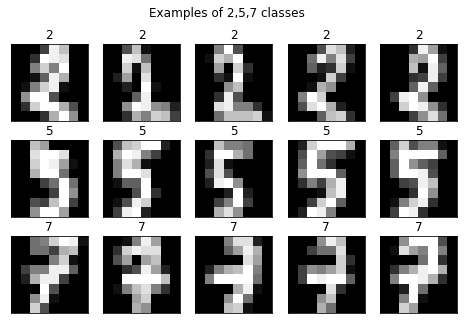

In [15]:
#Select some examples of each class
examples_2 = X[y == 2][:5]
examples_5 = X[y == 5][:5]
examples_7 = X[y == 7][:5]

# Plot the examples
fig, axes = plt.subplots(3, 5, figsize=(8, 5),
                         subplot_kw={'xticks':[], 'yticks':[]})
fig.suptitle("Examples of 2,5,7 classes")
for ax, example in zip(axes[0], examples_2):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("2")
for ax, example in zip(axes[1], examples_5):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("5")
for ax, example in zip(axes[2], examples_7):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("7")

plt.show()

# **T1 - Define and train a rectangular SOM**

In [22]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the SOM
som = MiniSom(25, 25, X_train.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)

# Train the SOM using the batch algorithm
som.train_batch(X_train, 100)

# Report on the quantization and topographic errors
qe = som.quantization_error(X)
te = som.topographic_error(X)
print(f"Batch SOM - Quantization error: {qe:.4f} - Topographic error: {te:.4f}")

Batch SOM - Quantization error: 23.7248 - Topographic error: 0.1059


In [25]:
# Initialize the SOM
som = MiniSom(25, 25, X_train.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM for 3 attempts and keep track of the errors
best_som = None
best_qe = None
best_te = None

for i in range(3):
    som.train_random(X_train, 100)
    qe = som.quantization_error(X)
    te = som.topographic_error(X)
    if (best_qe is None or qe < best_qe) or (best_te is None or te < best_te):
        best_som = som
        best_qe = qe
        best_te = te
        
    print(f"Attempt {i+1} - Quantization error: {qe:.4f} - Topographic error: {te:.4f}")

print(f"Best SOM - Quantization error: {best_qe:.4f} - Topographic error: {best_te:.4f}")

Attempt 1 - Quantization error: 23.5745 - Topographic error: 0.1078
Attempt 2 - Quantization error: 22.4476 - Topographic error: 0.0335
Attempt 3 - Quantization error: 21.5894 - Topographic error: 0.0539
Best SOM - Quantization error: 21.5894 - Topographic error: 0.0539


i) The U-matrix and the class representation map

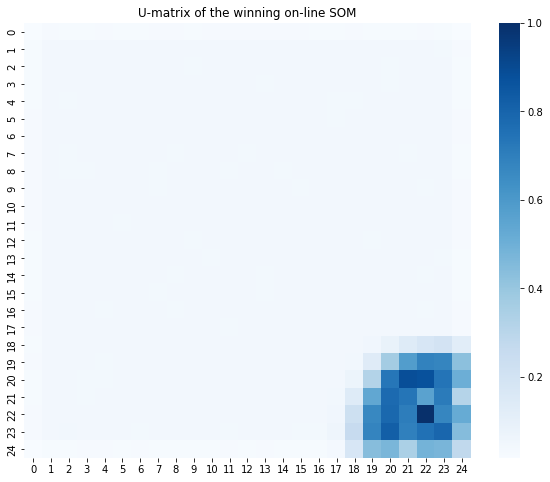

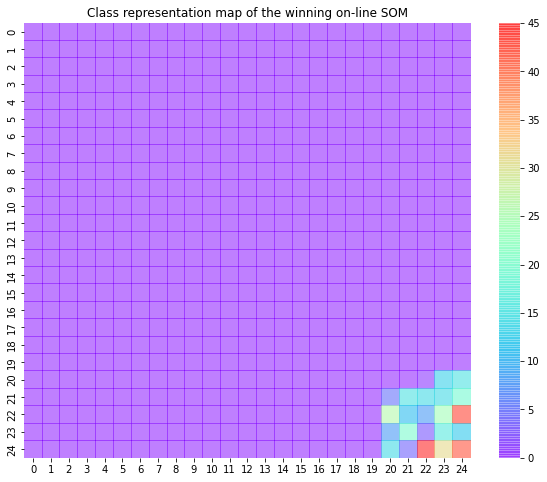

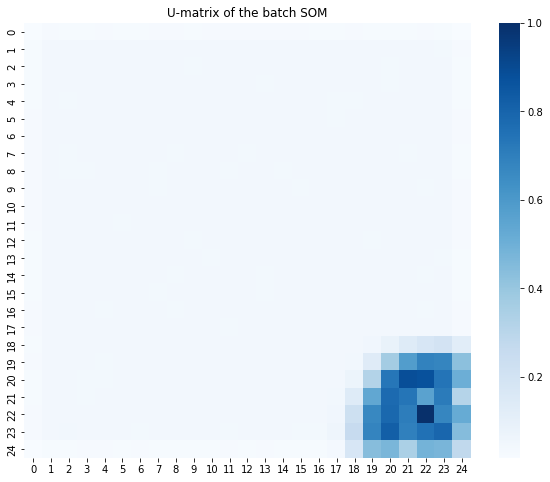

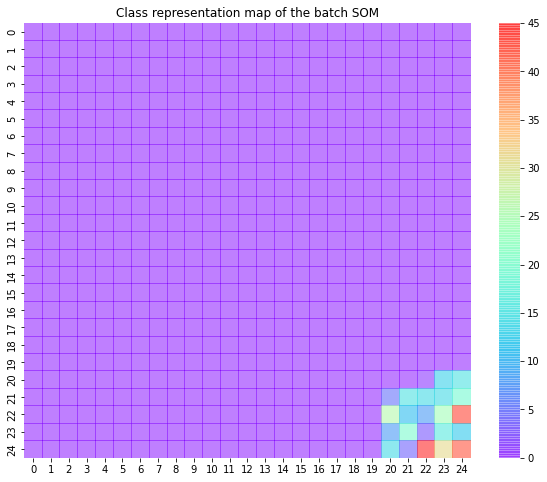

In [27]:
# Plot the U-matrix of the winning on-line SOM
plt.figure(figsize=(10, 8))
plt.title("U-matrix of the winning on-line SOM")
sns.heatmap(best_som.distance_map().T, cmap="Blues")
plt.show()

# Plot the class representation map of the winning on-line SOM
plt.figure(figsize=(10, 8))
plt.title("Class representation map of the winning on-line SOM")
sns.heatmap(best_som.activation_response(X_train), cmap="rainbow", alpha=0.5)
plt.show()

# Plot the U-matrix of the batch SOM
plt.figure(figsize=(10, 8))
plt.title("U-matrix of the batch SOM")
sns.heatmap(som.distance_map().T, cmap="Blues")
plt.show()

# Plot the class representation map of the batch SOM
plt.figure(figsize=(10, 8))
plt.title("Class representation map of the batch SOM")
sns.heatmap(som.activation_response(X_train), cmap="rainbow", alpha=0.5)
plt.show()


ii) The confusion matrix and the classification accuracy for the test set using the SOM as a classifier

In [28]:
# Classify the test set using the winning on-line SOM
test_classification = np.array([best_som.winner(x) for x in X_test])

# Determine the accuracy of the SOM classification
accuracy = np.mean(test_classification == y_test)
print("SOM accuracy on test set:", accuracy)

# Create confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, test_classification)
print(conf_matrix)

SOM accuracy on test set: 0.0


<ipython-input-28-13c382fd052b>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(test_classification == y_test)


ValueError: ignored

SOM accuracy on test set: 0.34814814814814815
[[ 0 49  0]
 [ 0 47  0]
 [ 0 39  0]]


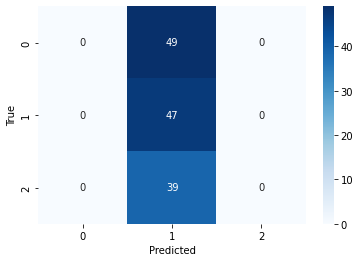

In [29]:
# Find the class labels of the closest samples to each winning neuron
predicted_labels = [y_train[np.argmin(best_som.distance_map()[x[0], x[1]])] for x in test_classification]

# Calculate the accuracy
accuracy = np.mean(predicted_labels == y_test)
print("SOM accuracy on test set:", accuracy)

# Create confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()